# 데이터 불러오기

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [69]:
# 지수 표기법 변경
np.set_printoptions(precision=6, suppress=True)
pd.options.display.float_format = '{:.3f}'.format

In [70]:
# data load
path = '/Users/luci031/Desktop/Coding/chai/data'
df = pd.read_csv(path+'/chai_proceed.csv')

In [71]:
# 시계열 처리

df['created_at'] = pd.to_datetime(df['created_at'])
df['birthday'] = pd.to_datetime(df['birthday'])
df['sign_up_date'] = pd.to_datetime(df['sign_up_date'])

In [72]:
# customer_id, merchant_id string으로 변경

df['customer_id'] = df['customer_id'].astype('string')
df['merchant_id'] = df['merchant_id'].astype('string')

In [73]:
# 나이 이상치 제거
ddd = dt.datetime(1930,1,1)
df[df['birthday']<ddd]['birthday'].value_counts()

1900-01-01    8913
1928-01-21      72
1929-03-20      30
1929-01-02       7
1919-05-15       6
1927-11-02       4
1929-07-26       1
1927-11-25       1
1926-02-20       1
1927-10-17       1
1926-07-03       1
Name: birthday, dtype: int64

In [74]:
# unnamed 삭제
df = df.iloc[::,1:]

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5623810 entries, 0 to 5623809
Data columns (total 13 columns):
 #   Column           Dtype         
---  ------           -----         
 0   customer_id      string        
 1   created_at       datetime64[ns]
 2   pre_discount     int64         
 3   post_discount    int64         
 4   cashback_amount  int64         
 5   discount_amount  int64         
 6   total_promotion  int64         
 7   push_permission  bool          
 8   gender           int64         
 9   is_foreigner     bool          
 10  birthday         datetime64[ns]
 11  sign_up_date     datetime64[ns]
 12  merchant_id      string        
dtypes: bool(2), datetime64[ns](3), int64(6), string(2)
memory usage: 482.7 MB


# 데이터 탐색

## 전반적인 데이터 분포

In [76]:
df.head()

,customer_id,created_at,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion,push_permission,gender,is_foreigner,birthday,sign_up_date,merchant_id
0,207317,2020-03-22 10:27:52.498,36236,36236,1087,0,1087,True,1,False,1957-11-05,2019-11-30 16:48:19.339,9
1,95246,2020-03-12 09:41:09.845,12900,12900,387,0,387,True,1,False,1983-10-23,2019-07-09 08:21:14.098,6
2,208074,2020-02-01 08:54:53.246,7500,7500,225,0,225,True,1,False,1975-07-06,2019-08-15 01:02:13.336,9
3,15552,2020-03-06 10:23:21.183,11800,11800,354,0,354,False,0,False,1996-08-21,2019-08-06 02:09:28.712,4
4,511595,2020-03-13 12:00:27.914,29700,29700,891,0,891,True,1,False,1999-01-23,2020-03-12 00:33:46.147,5


In [77]:
# 데이터 분포
df.describe()

,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion,gender
count,5623810.000,5623810.000,5623810.000,5623810.000,5623810.000,5623810.000
mean,20455.330,19033.951,122.669,1421.380,1544.048,0.724
std,48731.631,47552.056,593.514,1960.640,1979.354,0.447
min,1.000,0.000,0.000,0.000,0.000,0.000
25%,7900.000,6900.000,0.000,0.000,542.000,0.000
50%,11900.000,10900.000,0.000,1000.000,1000.000,1.000
75%,19800.000,17920.000,0.000,2000.000,2000.000,1.000
max,1996000.000,1996000.000,97473.000,500000.000,500000.000,1.000


**Analysis**
- pre_discount와 post_discount의 평균값 및  discount_amount를 확인해봤을 때 평균적으로 1420원 정도 할인이 들어감을 알 수 있다
- 1회에 최대 결제 금액은 1996000원, 약 200만원 가량
- 평균 캐시백 금액은 122.6원, 최대 캐시백 금액은 97473원, 그러나 3사분면까지 캐시백 금액이 0원인 것으로 보아 캐시백이 많이 이뤄지고 있지는 않다
- 평균 할인 금액은 1421.4원, 최대 할인 금액은 500000원, 2사분면 지점의 값이 1000원인 것으로 보아 할인 제도가 캐시백보다 활성화되었음을 알 수 있고, 금액 또한 더 크다
- 둘을 합친 total_promotion의 경우 평균 할인 금액은 1421.3원 가량 -> 캐시백과 일반 할인이 동시에 이뤄지는 지 확인 필요
- Gender의 경우 1이 여성, 0이 남성이므로 1에 가까울수록 여성이 많고, 반대의 경우는 남성이 많은 것으로 해석 가능
- Gender의 평균값은 0.724 -> 여성 유저가 남성 유저보다 결제 건수가 많다는 것을 알 수 있다

In [78]:
# 데이터 간 상관관계
df.corr()

,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion,push_permission,gender,is_foreigner
pre_discount,1.000,0.999,0.232,0.614,0.678,-0.019,-0.050,-0.002
post_discount,0.999,1.000,0.243,0.588,0.656,-0.017,-0.048,-0.001
cashback_amount,0.232,0.243,1.000,-0.120,0.181,0.009,-0.012,0.009
discount_amount,0.614,0.588,-0.120,1.000,0.955,-0.048,-0.075,-0.019
total_promotion,0.678,0.656,0.181,0.955,1.000,-0.045,-0.078,-0.016
push_permission,-0.019,-0.017,0.009,-0.048,-0.045,1.000,0.060,0.066
gender,-0.050,-0.048,-0.012,-0.075,-0.078,0.060,1.000,0.031
is_foreigner,-0.002,-0.001,0.009,-0.019,-0.016,0.066,0.031,1.000


**Analysis**
- pre_discount, post_discount, cashback_amount, discount_amount, total_promotion은 서로 수치를 이용하여 생성된 값이므로 당연히 상관관계가 있음
- push_permission, gender, is_foreigner 등은 단순한 집계 방식으로는 상관관계 분석이 어려움 -> 가설을 세우고 검정하는 단계 필요

array([[<AxesSubplot:title={'center':'created_at'}>,
        <AxesSubplot:title={'center':'pre_discount'}>,
        <AxesSubplot:title={'center':'post_discount'}>],
       [<AxesSubplot:title={'center':'cashback_amount'}>,
        <AxesSubplot:title={'center':'discount_amount'}>,
        <AxesSubplot:title={'center':'total_promotion'}>],
       [<AxesSubplot:title={'center':'gender'}>,
        <AxesSubplot:title={'center':'birthday'}>,
        <AxesSubplot:title={'center':'sign_up_date'}>]], dtype=object)

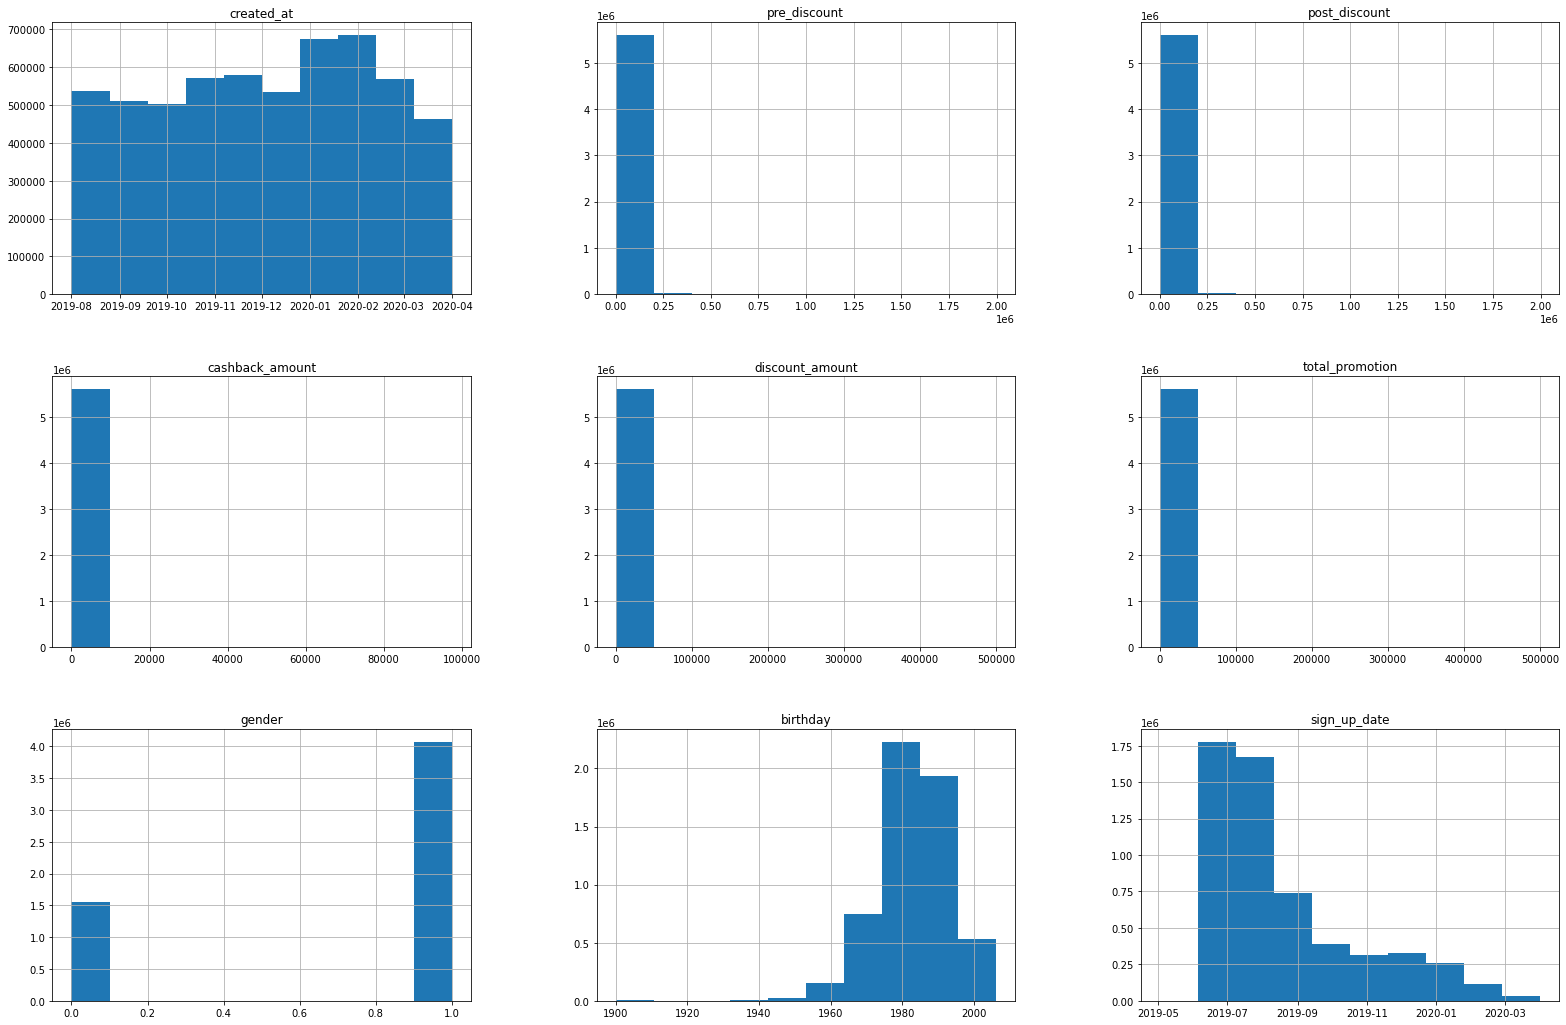

In [79]:
# 전반적인 데이터 분포
df.hist(figsize=(27,18))

### Result
- 각 column 별 분석 진행
- customer_id를 통한 유저 별 구매 건수 및 금액 조사 필요
- 구매일시 (월별, 주별, 일별, 시간대별 등), 가입일자를 이용한 데이터 분석 필요
- merchant_id를 이용한 산업별 소비 정도 탐색 필요
- gender, push_permission, is_foreigner 이용한 AB 테스트 실험
- push_permission + birthday 활용한 생일 쿠폰 전략
- 각 거래 및 평균적인 할인 비율 조사 필요

## Column 별 탐색 및 분석

###

### customer_id

avg : 10.32041341772477


/Users/luci031/miniforge3/envs/yds/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


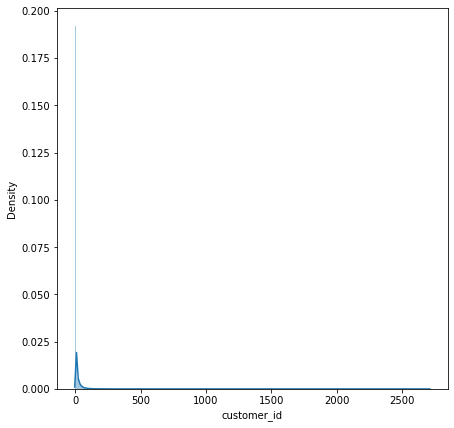

In [80]:
# 총 유저 수 및 유저별 거래량 -> 평균 사용 정도는 10회지만 전반적인 유저 사용 빈도는 적은 편
df_v = df['customer_id'].value_counts()
print(f'avg : {np.mean(df_v.values)}')
plt.figure(figsize=(7,7))
sns.distplot(df_v, bins=1000)
plt.show()

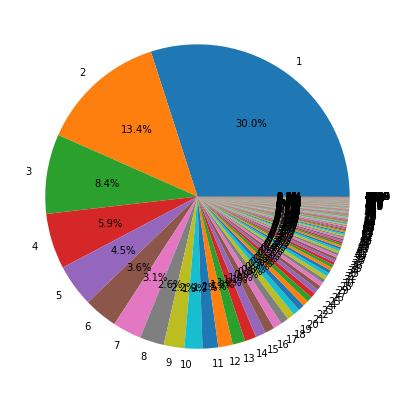

In [81]:
# 점차 유저별 구매 횟수가 감소하는 것을 알 수 있음 누적함수
a = df['customer_id'].value_counts().to_frame()['customer_id'].value_counts().to_frame().reset_index()
a = a.rename(columns={'index':'pur_count','customer_id':'count'})
plt.figure(figsize=(7,7),facecolor='white')
plt.pie(a['count'], labels=a['pur_count'],autopct='%.1f%%')
plt.show()

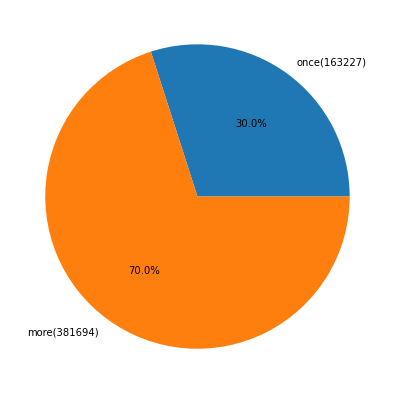

In [82]:
# 30% 가량의 고객은 단 한번만 결제를 함
plt.figure(figsize=(7,7),facecolor="white")
once = df_v[df_v.values==1].count()
more = df_v[df_v.values!=1].count()
labels= ['once'+'('+(str(once))+')','more'+'('+(str(more))+')']
plt.pie([once,more],labels=labels, autopct='%.1f%%')
plt.show()

In [83]:
# 재구매율은 중요한 지표이므로 column에 새로 추가 -> 한번 이상만 구매하면 문제 없는 것으로 인식
df['once'] = False
df_v = df_v.to_frame().reset_index()
df_v = df_v.rename(columns={'index':'customer_id','customer_id':'count'})
df = pd.merge(df,df_v,on='customer_id')
df.loc[df['count']==1,'once'] = True
df = df.iloc[::,:-1]
df['once'].value_counts()

False    5460583
True      163227
Name: once, dtype: int64

In [84]:
# 유저별 총 구매 데이터
df_cus1 = df.groupby('customer_id').sum().reset_index()
df_cus1.describe()

,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion,push_permission,gender,is_foreigner,once
count,544921.000,544921.000,544921.000,544921.000,544921.000,544921.000,544921.000,544921.000,544921.000
mean,211107.465,196438.240,1265.993,14669.225,15935.218,5.335,7.469,0.114,0.300
std,550003.100,527836.212,4782.908,26430.607,28799.927,17.769,19.208,4.137,0.458
min,500.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,23800.000,20140.000,0.000,2000.000,3000.000,0.000,0.000,0.000,0.000
50%,67300.000,60480.000,0.000,6000.000,6681.000,0.000,1.000,0.000,0.000
75%,206356.000,191024.000,660.000,15396.000,16663.000,3.000,6.000,0.000,1.000
max,115005350.000,112273800.000,851803.000,2731550.000,2731550.000,2705.000,2705.000,1229.000,1.000


**Analysis**
- 유저들은 평균적으로 기간 동안 21만원 가량을 소비했으며, 약 16000원 정도 프로모션이 적용되어 19.6만원 선에서 구매를 했다
- 유저 별 총 구매 금액의 표준 편차는 55만원 선, 그리고 결제 금액의 75% 지점이 20만원인 것으로 보아 라이트 유저와 헤비 유저 사이의 갭이 꽤 큰 것을 알 수 있다 (파레토 법칙 조사 필요)
- 기간 내 결제한 금액이 오직 500원인 유저가 있다
- 어떤 유저는 할인이 적용되어 서비스를 0원에 이용했다
- 위의 분석대로, 전반적으로 캐시백보단 할인 정책이 활성화 되어있다
- 유저들은 기간 동안 인당 16000원 가량의 할인을 받았다
- 평균 총 결제 금액에 따른 할인율은 약 7.5%
- 가장 결제를 많이 한 고객은 기간 동안 1.15억 가량을 결제했다
- 가장 프로모션을 많이 제공받은 고객은 273만원 상당의 프로모션 혜택을 받았다

In [85]:
# 번외: 1억 상당을 구매한 최고의 VIP의 거래 기록, 총 175건을 결제했다
df_cus1[df_cus1['pre_discount'] == max(df_cus1['pre_discount'])]

,customer_id,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion,push_permission,gender,is_foreigner,once
308203,377381,115005350,112273800,0,2731550,2731550,175,0,0,0


In [86]:
# 유저별 평균 구매 데이터
df_cus2 = df.groupby('customer_id').mean().reset_index()
df_cus2.describe()

,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion,push_permission,gender,is_foreigner,once
count,544921.000,544921.000,544921.000,544921.000,544921.000,544921.000,544921.000,544921.000,544921.000
mean,27819.597,25691.276,110.662,2128.321,2238.983,0.419,0.641,0.006,0.300
std,58558.517,57282.716,657.241,2184.221,2219.018,0.493,0.480,0.076,0.458
min,500.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,11472.500,9800.000,0.000,1000.176,1179.879,0.000,0.000,0.000,0.000
50%,16140.333,14504.000,0.000,1666.667,1752.756,0.000,1.000,0.000,0.000
75%,25000.000,23000.000,74.889,2333.333,2470.000,1.000,1.000,0.000,1.000
max,1990950.000,1985950.000,94772.000,254000.000,254000.000,1.000,1.000,1.000,1.000


**Analysis**
- 한 유저 당 거래별 평균 거래 금액은 27800원 가량, 평균적으로 2200원 상당의 할인을 받았다
- 유저 별 총 구매 금액의 표준 편차는 5.8만원 선, 역시 평균 거래 금액을 웃도는 격차가 있다
- 평균 거래 금액의 75% 지점이 25000원인 것으로 보아 헤비 유저와 라이트 유저 사이의 갭을 다시한 번 체감할 수 있다
- 평균 결제 금액에 따른 할인율은 약 8% -> 매 거래 때 비슷한 비율로 할인을 받음을 알 수 있다
- 가장 평균 구매 비용이 높은 고객은 평균적으로 200만원 가량을 결제한다

#### Result
- 라이트 유저와 헤비 유저 사이의 갭이 심함, 헤비 유저의 기준 정립 필요
- VIP 관리 방법론 찾아보기 (파레토 법칙 등)

### Prices
- pre_discount, post_discount, cashback_amount, discount_amount, total_promotion 분석

- cashback의 경우, 사후 적립되는 것이기 때문에 post_discount 금액에는 반영되지 않음
- discount 금액이 제대로 적용됐는지 확인 필요

In [87]:
# discount_amount 값에 문제 없는 것 확인
df['diff'] = 0
df.loc[df['pre_discount']-df['post_discount']!=df['discount_amount'],'diff'] = df['pre_discount']-df['post_discount']
df['diff'].value_counts()
df = df.iloc[::,:-1]

In [88]:
# 최종적인 사용 금액과 cashback, discount_amount 비교 (pre_discount-total_promotion)
# cashback 까지 적용되면 소비자는 얼마에 서비스를 이용하는가
print(f"총 결제 금액: {sum(df['pre_discount']):,}원")
print(f"할인 후 금액: {sum(df['post_discount']):,}원")
print(f"할인+캐시백 적용 금액: {sum(df['post_discount'])-sum(df['cashback_amount']):,}원")
print(f"캐시백 합계: {sum(df['cashback_amount']):,}원")
print(f"할인 합계: {sum(df['discount_amount']):,}원")
print(f"promotion 합계 (순비용): {sum(df['total_promotion']):,}원")
print(f"사용금액 대비 캐시백 비율: {sum(df['cashback_amount'])/sum(df['pre_discount'])*100}%")
print(f"사용금액 대비 할인 비율: {sum(df['discount_amount'])/sum(df['pre_discount'])*100}%")
print(f"사용금액 대비 promotion 비율: {sum(df['total_promotion'])/sum(df['pre_discount'])*100}%")


총 결제 금액: 115,036,891,079원
할인 후 금액: 107,043,322,235원
할인+캐시백 적용 금액: 106,353,456,164원
캐시백 합계: 689,866,071원
할인 합계: 7,993,568,844원
promotion 합계 (순비용): 8,683,434,915원
사용금액 대비 캐시백 비율: 0.5996911638773721%
사용금액 대비 할인 비율: 6.948700342145483%
사용금액 대비 promotion 비율: 7.548391506022856%


### 

In [89]:
# 거래 별 사용 금액과 cashback, discount_amount 비교 (pre_discount-total_promotion)
print(f"평균 결제 금액: {round(np.mean(df['pre_discount']),3):,}원")
print(f"평균 할인 후 금액: {round(np.mean(df['post_discount']),3):,}원")
print(f"평균 할인+캐시백 후 금액: {round(np.mean(df['post_discount'])-np.mean(df['cashback_amount']),3):,}원")
print(f"캐시백 평균: {round(np.mean(df['cashback_amount']),3):,}원")
print(f"할인 평균: {round(np.mean(df['discount_amount']),3):,}원")
print(f"promotion 평균 (순비용): {round(np.mean(df['total_promotion']),3):,}원")

평균 결제 금액: 20,455.33원
평균 할인 후 금액: 19,033.951원
평균 할인+캐시백 후 금액: 18,911.282원
캐시백 평균: 122.669원
할인 평균: 1,421.38원
promotion 평균 (순비용): 1,544.048원


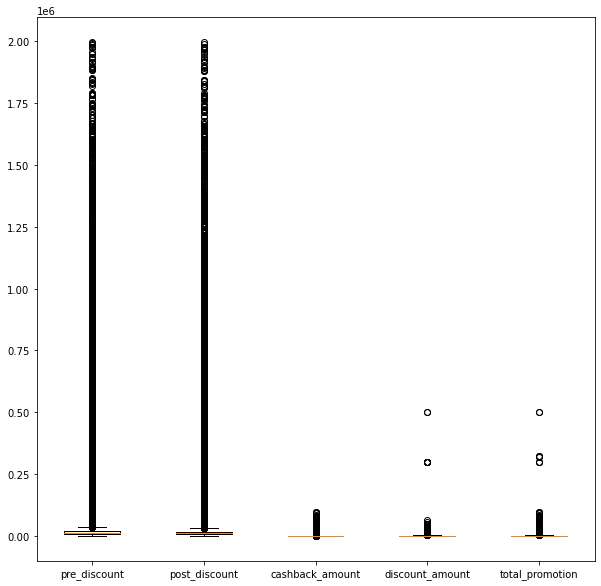

In [90]:
# 거래 분포 -> 분포도 확인 결과 헤비 유저와 라이트 유저 사이의 갭이 심하기 때문에 아예 분리해서 분석할 필요 있는 듯
plt.figure(figsize=(10,10))
plt.boxplot(df.iloc[:,2:7],labels=['pre_discount','post_discount','cashback_amount','discount_amount','total_promotion'])
# plt.ticklabel_format(style='plain', axis='x')
plt.show()

### push_permission
- Push 알림 설정 여부에 따른 유저 별 차이 분석

In [91]:
# 유저 유형별 탐색
# push 알림을 중간에 끄거나 한 유저는 없음 -> 유저별 기록이기에 데이터를 수집한 타이밍의 정보일 수도 있음
df.groupby(['customer_id','push_permission']).count().reset_index()['customer_id'].value_counts().values.value_counts()

1    544921
dtype: Int64

In [92]:
# 유저 수
display(df[df['push_permission']==True]['customer_id'].value_counts())
display(df[df['push_permission']==False]['customer_id'].value_counts())
# 유저 별 평균 거래 수
display("Push : " + str(np.mean(df[df['push_permission']==True]['customer_id'].value_counts().values)))
display("Not Push : " + str(np.mean(df[df['push_permission']==False]['customer_id'].value_counts().values)))
# 거래 별 특징
display(df[df['push_permission']==True].describe())
display(df[df['push_permission']==False].describe())

45419     2705
445691    2630
485910    1684
400418    1363
96306     1229
          ... 
84947        1
216551       1
397545       1
432828       1
434118       1
Name: customer_id, Length: 228121, dtype: Int64

112309    477
506352    426
543273    426
156394    425
530784    399
         ... 
177907      1
415860      1
170433      1
42203       1
30777       1
Name: customer_id, Length: 316800, dtype: Int64

'Push : 12.744753880615988'

'Not Push : 8.57469696969697'

,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion,gender
count,2907346.000,2907346.000,2907346.000,2907346.000,2907346.000,2907346.000
mean,19577.073,18246.189,127.765,1330.884,1458.650,0.750
std,43630.496,42606.713,584.730,1826.189,1847.233,0.433
min,1.000,0.000,0.000,0.000,0.000,0.000
25%,7900.000,6900.000,0.000,0.000,495.000,0.000
50%,11900.000,10900.000,0.000,1000.000,1000.000,1.000
75%,19800.000,17900.000,0.000,2000.000,2000.000,1.000
max,1996000.000,1996000.000,95735.000,500000.000,500000.000,1.000


,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion,gender
count,2716464.000,2716464.000,2716464.000,2716464.000,2716464.000,2716464.000
mean,21395.301,19877.067,117.214,1518.234,1635.448,0.696
std,53640.679,52316.539,602.726,2090.665,2107.790,0.460
min,1.000,0.000,0.000,0.000,0.000,0.000
25%,7900.000,6797.750,0.000,228.000,586.000,0.000
50%,12000.000,10900.000,0.000,1000.000,1134.000,1.000
75%,19800.000,18000.000,0.000,2000.000,2000.000,1.000
max,1986000.000,1976000.000,97473.000,300000.000,319313.000,1.000


**Analysis**
- push 알림 설정 유저 (이하 push 유저) 수는 228121명, push 알림 미설정 유저 (이하 not push 유저)는 316800명
- push 유저의 평균 거래건수는 12.74건, not push 유저의 평균 거래건수는 8.57건으로 push 유저가 더 많이 서비스를 이용했다.
- push 유저와 not push 유저 수는 9만명 가량 차이가 나지만 둘의 거래 건수는 비슷함 -> push 활성화 유저가 더욱 서비스를 많이 이용
- push 유저의 회당 평균 구매 금액은 약 19577원, not push 유저의 회당 평균 구매 금액은 21395원 가량으로, 오히려 not push 유저가 결제 금액 자체도 크고, 할인되는 금액도 많다 -> push 유저는 할인율이 떨어져도 이미 서비스를 수 회 이상 이용한 상태기 때문에 계속 사용하는 것으로 확인
- push 유저도 여성이 더 많다.

### gender
- 남성이 0 여성이 1

In [93]:
# 성별 값이 2개 되는 고객 있는 지 확인 -> 문제 없음
df.groupby(['customer_id','gender']).count().reset_index()['customer_id'].value_counts().values.value_counts()

1    544921
dtype: Int64

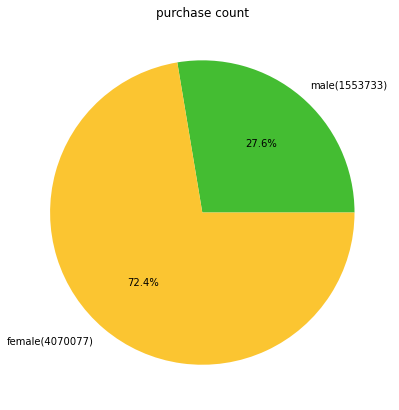

In [94]:
# 전반적인 거래량 분포
a = len(df[df['gender']==0])
b = len(df[df['gender']!=0])

plt.figure(figsize=(7,7),facecolor="white")
plt.title('purchase count')
labels= ['male'+'('+str(a)+')','female'+'('+str(b)+')']
plt.pie([a,b],labels=labels, autopct='%.1f%%',colors=['#44bd32','#fbc531'])
plt.show()

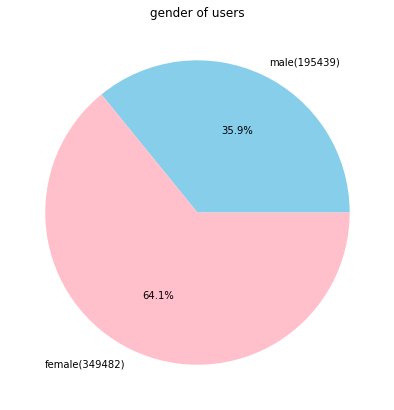

In [95]:
# 성별별 유저 수
a = len(df_cus1[df_cus1['gender']==0])
b = len(df_cus1[df_cus1['gender']!=0])

plt.figure(figsize=(7,7),facecolor="white")
plt.title('gender of users')
labels= ['male'+'('+str(a)+')','female'+'('+str(b)+')']
plt.pie([a,b],labels=labels, autopct='%.1f%%',colors=['skyblue','pink'])
plt.show()

In [96]:
# 성별에 따른 거래 특성
# 총 거래량
# 남성 유저 
display(df_cus1[df_cus1['gender']==0].describe())
# 여성유저
display(df_cus1[df_cus1['gender']!=0].describe())
# 평균 거래량
# 남성유저
display(df[df['gender']==0].describe())
# 여성유저
display(df[df['gender']!=0].describe())

# 남성 유저의 평균 구매 수
print(f"male's avg of purchase count : {np.mean(df[df['gender']==0].groupby('customer_id').count()['pre_discount'].values)}")
# 여성 유저의 평균 구매 수
print(f"female's avg of purchase count : {np.mean(df[df['gender']==1].groupby('customer_id').count()['pre_discount'].values)}")

,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion,push_permission,gender,is_foreigner,once
count,195439.000,195439.000,195439.000,195439.000,195439.000,195439.000,195439.000,195439.000,195439.000
mean,193735.552,180533.273,1069.679,13202.279,14271.958,3.721,0.000,0.046,0.334
std,683155.843,660641.626,4506.376,26840.158,28758.490,12.990,0.000,1.635,0.472
min,500.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,21150.000,17800.000,0.000,2000.000,2700.000,0.000,0.000,0.000,0.000
50%,59200.000,53000.000,0.000,6000.000,6000.000,0.000,0.000,0.000,0.000
75%,177765.000,163770.500,357.000,13610.000,14647.000,2.000,0.000,0.000,1.000
max,115005350.000,112273800.000,202326.000,2731550.000,2731550.000,416.000,0.000,200.000,1.000


,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion,push_permission,gender,is_foreigner,once
count,349482.000,349482.000,349482.000,349482.000,349482.000,349482.000,349482.000,349482.000,349482.000
mean,220822.270,205332.692,1375.776,15489.578,16865.354,6.238,11.646,0.152,0.280
std,458712.839,436033.849,4927.393,26162.988,28781.240,19.892,22.949,5.019,0.449
min,500.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000
25%,25600.000,21900.000,0.000,2540.000,3000.000,0.000,1.000,0.000,0.000
50%,72310.000,65540.000,0.000,6470.000,7000.000,0.000,4.000,0.000,0.000
75%,224673.750,207702.250,842.000,16560.000,18000.000,3.000,12.000,0.000,1.000
max,35043786.000,34447704.000,851803.000,807400.000,961803.000,2705.000,2705.000,1229.000,1.000


,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion,gender
count,1553733.000,1553733.000,1553733.000,1553733.000,1553733.000,1553733.000
mean,24369.362,22708.691,134.551,1660.672,1795.223,0.000
std,68086.394,66400.361,748.231,2562.774,2601.581,0.000
min,1.000,0.000,0.000,0.000,0.000,0.000
25%,7650.000,6304.000,0.000,300.000,621.000,0.000
50%,11900.000,10584.000,0.000,1070.000,1290.000,0.000
75%,19800.000,17900.000,0.000,2000.000,2000.000,0.000
max,1990950.000,1985950.000,94772.000,500000.000,500000.000,0.000


,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion,gender
count,4070077.000,4070077.000,4070077.000,4070077.000,4070077.000,4070077.000
mean,18961.167,17631.136,118.133,1330.031,1448.164,1.000
std,38775.913,37870.300,522.435,1665.576,1672.257,0.000
min,1.000,0.000,0.000,0.000,0.000,1.000
25%,7900.000,6900.000,0.000,0.000,500.000,1.000
50%,11970.000,10900.000,0.000,1000.000,1000.000,1.000
75%,19800.000,17999.000,0.000,2000.000,2000.000,1.000
max,1996000.000,1996000.000,97473.000,300000.000,322562.000,1.000


male's avg of purchase count : 7.949963927363525
female's avg of purchase count : 11.646027549344458


**Analysis**
- 남성 유저 비율이 35.9%, 여성은 64.1%로 여성 유저가 많다
- 남성 유저의 결제 수는 27.6%, 여성은 72.4%로 전반적으로 여성 유저가 많은 비중을 차지하고 있다
- 남성 유저은 기간 동안 평균적으로 총 19.4만원 정도의 금액을 결제하였으며 여성 유저는 22만원 선의 금액을 결제하였다. 할인 금액도 남성은 14300원, 여성은 16800원 선으로 꽤 큰 차이를 보인다.
- 다만 결제 금액의 표준 편차가 남성은 68만원, 여성은 46만원으로 남성 중에 Heavy 유저가 있을 가능성이 더 높다
- 1회 당 결제 금액은 남성이 24400원, 여성이 19000원으로 남성이 단순 결제 금액은 많은 것을 알 수 있다. 다만 남성 유저의 평균 구매 횟수는 8회, 여성은 11.6회이므로 역시 여성 유저가 많은 비중을 차지하고 있다고 할 수 있다.

### is_foreigner

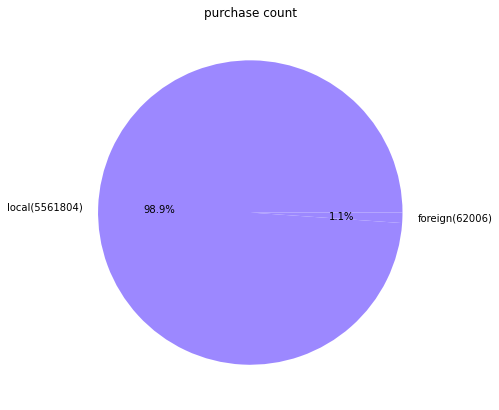

In [97]:
# 전반적인 거래량 분포
a = len(df[df['is_foreigner']==False])
b = len(df[df['is_foreigner']==True])

plt.figure(figsize=(7,7),facecolor="white")
plt.title('purchase count')
labels= ['local'+'('+str(a)+')','foreign'+'('+str(b)+')']
plt.pie([a,b],labels=labels, autopct='%.1f%%',colors=['#9c88ff','#9c88ff'])
plt.show()

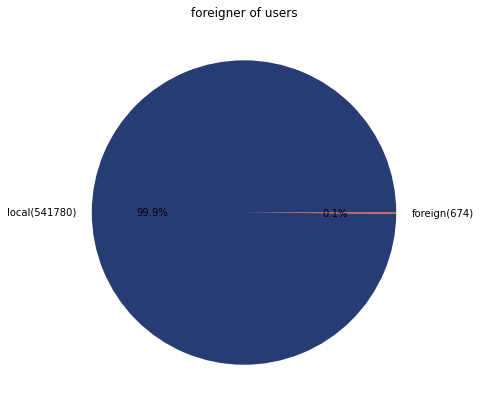

In [98]:
# 내국인/외국인 유저 수
a = len(df_cus1[df_cus1['is_foreigner']==False])
b = len(df_cus1[df_cus1['is_foreigner']==True])

plt.figure(figsize=(7,7),facecolor="white")
plt.title('foreigner of users')
labels= ['local'+'('+str(a)+')','foreign'+'('+str(b)+')']
plt.pie([a,b],labels=labels, autopct='%.1f%%',colors=['#273c75','#e84118'])
plt.show()

**Analysis**
- 전체 유저 54만명 중에 외국인 유저는 674명 뿐
- 이들에 대해 분석하고 따로 전략을 짜는 것 자체가 큰 의미가 없으므로 분석 X

### merchant_id

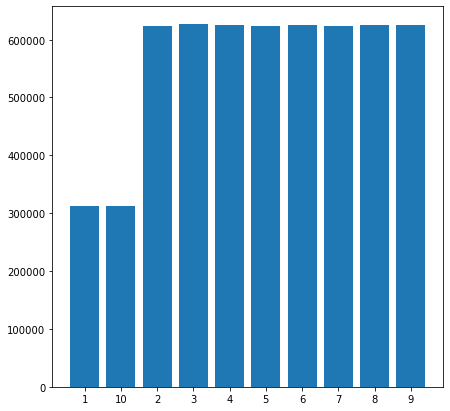

In [99]:
# 분포

plt.figure(figsize=(7,7),facecolor = "white")
plt.bar(df.groupby('merchant_id').count()['customer_id'].index,df.groupby('merchant_id').count()['customer_id'].values)
plt.show()

In [100]:
# 각 코드별 특징

for code in sorted(df['merchant_id'].unique().tolist()):
    display("merchant_id = "+code)
    display(df[df['merchant_id'] == code].describe())

'merchant_id = 1'

,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion,gender
count,312192.000,312192.000,312192.000,312192.000,312192.000,312192.000
mean,20475.785,19053.075,121.612,1422.710,1544.323,0.723
std,48454.450,47289.304,563.539,1905.313,1914.574,0.448
min,3.000,0.000,0.000,0.000,0.000,0.000
25%,7900.000,6900.000,0.000,0.000,543.000,0.000
50%,11952.000,10900.000,0.000,1000.000,1000.000,1.000
75%,19800.000,18050.000,0.000,2000.000,2000.000,1.000
max,1782520.000,1780520.000,65443.000,50000.000,65443.000,1.000


'merchant_id = 10'

,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion,gender
count,312099.000,312099.000,312099.000,312099.000,312099.000,312099.000
mean,20509.894,19084.724,122.849,1425.169,1548.019,0.725
std,48981.338,47798.159,624.465,1933.640,1959.933,0.447
min,50.000,0.000,0.000,0.000,0.000,0.000
25%,7900.000,6900.000,0.000,0.000,545.000,0.000
50%,11900.000,10900.000,0.000,1000.000,1000.000,1.000
75%,19800.000,18000.000,0.000,2000.000,2000.000,1.000
max,1891450.000,1891450.000,76200.000,58000.000,77200.000,1.000


'merchant_id = 2'

,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion,gender
count,624058.000,624058.000,624058.000,624058.000,624058.000,624058.000
mean,20439.109,19024.012,123.018,1415.097,1538.116,0.724
std,48808.499,47669.316,590.457,1895.708,1912.614,0.447
min,1.000,0.000,0.000,0.000,0.000,0.000
25%,7900.000,6900.000,0.000,0.000,544.000,0.000
50%,11900.000,10900.000,0.000,1000.000,1000.000,1.000
75%,19800.000,18000.000,0.000,2000.000,2000.000,1.000
max,1974000.000,1973000.000,95735.000,50000.000,96735.000,1.000


'merchant_id = 3'

,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion,gender
count,626313.000,626313.000,626313.000,626313.000,626313.000,626313.000
mean,20526.597,19104.692,122.304,1421.905,1544.209,0.724
std,48802.391,47623.844,568.707,1945.422,1960.942,0.447
min,1.000,0.000,0.000,0.000,0.000,0.000
25%,7900.000,6900.000,0.000,0.000,546.000,0.000
50%,11910.000,10900.000,0.000,1000.000,1000.000,1.000
75%,19800.000,18000.000,0.000,2000.000,2000.000,1.000
max,1972460.000,1962460.000,94935.000,300000.000,323250.000,1.000


'merchant_id = 4'

,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion,gender
count,625101.000,625101.000,625101.000,625101.000,625101.000,625101.000
mean,20462.767,19041.281,122.918,1421.485,1544.403,0.724
std,48698.007,47505.002,596.144,1961.617,1983.582,0.447
min,1.000,0.000,0.000,0.000,0.000,0.000
25%,7900.000,6900.000,0.000,0.000,537.000,0.000
50%,11900.000,10900.000,0.000,1000.000,1000.000,1.000
75%,19800.000,17900.000,0.000,2000.000,2000.000,1.000
max,1990950.000,1985950.000,80020.000,300000.000,319313.000,1.000


'merchant_id = 5'

,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion,gender
count,624215.000,624215.000,624215.000,624215.000,624215.000,624215.000
mean,20402.392,18982.685,122.772,1419.707,1542.478,0.723
std,48479.407,47281.380,576.799,1958.468,1970.620,0.448
min,80.000,0.000,0.000,0.000,0.000,0.000
25%,7900.000,6900.000,0.000,0.000,542.000,0.000
50%,11900.000,10900.000,0.000,1000.000,1000.000,1.000
75%,19800.000,17900.000,0.000,2000.000,2000.000,1.000
max,1986000.000,1976000.000,94048.000,300000.000,300000.000,1.000


'merchant_id = 6'

,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion,gender
count,624720.000,624720.000,624720.000,624720.000,624720.000,624720.000
mean,20470.856,19046.811,122.384,1424.045,1546.430,0.723
std,48848.684,47681.067,618.606,1949.698,1974.466,0.447
min,1.000,0.000,0.000,0.000,0.000,0.000
25%,7900.000,6900.000,0.000,0.000,546.000,0.000
50%,11900.000,10900.000,0.000,1000.000,1000.000,1.000
75%,19800.000,17950.000,0.000,2000.000,2000.000,1.000
max,1949490.000,1949490.000,97473.000,300000.000,300000.000,1.000


'merchant_id = 7'

,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion,gender
count,624287.000,624287.000,624287.000,624287.000,624287.000,624287.000
mean,20512.501,19089.690,124.443,1422.811,1547.253,0.724
std,49233.719,48026.263,623.887,2051.967,2075.973,0.447
min,1.000,0.000,0.000,0.000,0.000,0.000
25%,7900.000,6900.000,0.000,0.000,539.000,0.000
50%,11900.000,10900.000,0.000,1000.000,1000.000,1.000
75%,19800.000,17900.000,0.000,2000.000,2000.000,1.000
max,1844000.000,1843000.000,87075.000,500000.000,500000.000,1.000


'merchant_id = 8'

,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion,gender
count,624806.000,624806.000,624806.000,624806.000,624806.000,624806.000
mean,20459.836,19035.631,121.846,1424.205,1546.051,0.725
std,48937.142,47758.709,599.992,1956.258,1981.128,0.447
min,1.000,0.000,0.000,0.000,0.000,0.000
25%,7900.000,6900.000,0.000,0.000,540.000,0.000
50%,11900.000,10900.000,0.000,1000.000,1000.000,1.000
75%,19800.000,17900.000,0.000,2000.000,2000.000,1.000
max,1996000.000,1996000.000,79340.000,300000.000,322562.000,1.000


'merchant_id = 9'

,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion,gender
count,626019.000,626019.000,626019.000,626019.000,626019.000,626019.000
mean,20331.154,18911.935,122.108,1419.219,1541.326,0.724
std,48051.062,46871.201,569.784,2002.824,2013.075,0.447
min,1.000,0.000,0.000,0.000,0.000,0.000
25%,7900.000,6900.000,0.000,0.000,540.000,0.000
50%,11900.000,10900.000,0.000,1000.000,1000.000,1.000
75%,19800.000,17900.000,0.000,2000.000,2000.000,1.000
max,1974000.000,1966000.000,77370.000,500000.000,500000.000,1.000


**Analysis**
- 지나칠 정도로 데이터가 일정하게 분포되어 있음 -> 아무런 특징을 찾기 어려움
- 데이터의 변별력이 전혀 없으므로 임의로 생성된 코드라고 판단

### 할인율

In [101]:
# 할인율, 캐시백 비율, 총 할인율 column 생성
df['discount_rate'] = df['discount_amount']/df['pre_discount']
df['cashback_rate'] = df['cashback_amount']/df['pre_discount']
df['promotion_rate'] = (df['discount_amount']+df['cashback_amount'])/df['pre_discount']

In [102]:
# 할인율 분석
display('discount_rate')
display(df['discount_rate'].describe())
display('cashback_rate')
display(df['cashback_rate'].describe())
display('promotion_rate')
display(df['promotion_rate'].describe())

'discount_rate'

count   5623810.000
mean          0.100
std           0.115
min           0.000
25%           0.000
50%           0.101
75%           0.111
max           1.000
Name: discount_rate, dtype: float64

'cashback_rate'

count   5623810.000
mean          0.007
std           0.014
min           0.000
25%           0.000
50%           0.000
75%           0.000
max           0.050
Name: cashback_rate, dtype: float64

'promotion_rate'

count   5623810.000
mean          0.107
std           0.112
min           0.000
25%           0.032
50%           0.101
75%           0.111
max           1.000
Name: promotion_rate, dtype: float64

**Analysis**
- 위의 분석대로 cashback보단 discount가 더 활성화 되어있음
- discount의 경우 평균적으로 10%대 정도 할인을 받았고, 100% 할인이 되어 무료로 결제한 경우도 있음
- cashback은 0.7% 정도로 혜택을 받았고, 많이 받아도 5% cashback이 한계였던 것으로 보임
- 사분위수도 discount는 50%대부터 할인율이 10%를 넘겼지만 cashback은 75% 지점까지도 0

### 나이대 별 데이터분석

In [103]:
# Age column 생성
def age(born):
    today = dt.date.today()
    return today.year - born.year - ((today.month, 
                                      today.day) < (born.month, 
                                                    born.day))

df['age'] = df['birthday'].apply(age)

/Users/luci031/miniforge3/envs/yds/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

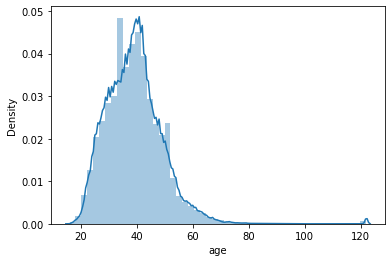

In [104]:
# 나이대 별  분포
sns.distplot(df['age'])

In [105]:
# 값중에 122세(1900년도 1월 1일 생)는 생일 누락자로 보임 -> 나이대별 분석 시에만 해당 년도생 제거하고 진행
df_age = df[df['age']!= 122]

In [141]:
# 5살 간격으로 분류
df_age.loc[:,'age_group'] = 0
df_age.loc[:,'age_group'] = (df['age']//5)*5

/var/folders/nq/s4zx76p53d11lnr0t1dxpxh00000gn/T/ipykernel_1505/236283950.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age.loc[:,'age_group'] = 0
/var/folders/nq/s4zx76p53d11lnr0t1dxpxh00000gn/T/ipykernel_1505/236283950.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age.loc[:,'age_group'] = (df['age']//5)*5


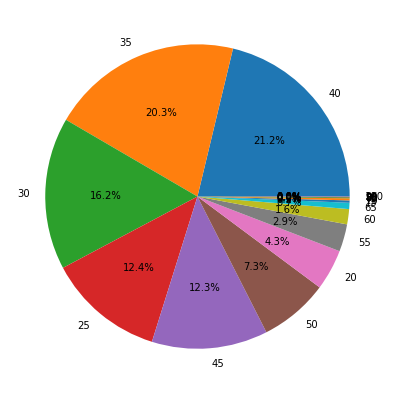

In [142]:
plt.figure(figsize=(7,7),facecolor="white")
labels = df_age['age_group'].value_counts().index.to_list()
plt.pie(df_age['age_group'].value_counts(),labels=labels,autopct='%.1f%%')
plt.show()

In [143]:
groups = sorted(df_age['age_group'].unique().tolist())

for group in groups:
    display(group)
    display(df_age[df_age['age_group'] == group].describe())

15

,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion,gender,discount_rate,cashback_rate,promotion_rate,age,age_group
count,13929.000,13929.000,13929.000,13929.000,13929.000,13929.000,13929.000,13929.000,13929.000,13929.000,13929.000
mean,14732.586,13599.038,90.445,1133.548,1223.993,0.811,0.092,0.007,0.099,18.413,15.000
std,22352.404,21582.856,310.349,1553.929,1527.135,0.391,0.122,0.013,0.118,0.721,0.000
min,100.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,16.000,15.000
25%,5000.000,4500.000,0.000,0.000,198.000,1.000,0.000,0.000,0.030,18.000,15.000
50%,9690.000,8400.000,0.000,780.000,890.000,1.000,0.085,0.000,0.087,19.000,15.000
75%,15880.000,14320.000,0.000,1870.000,1939.000,1.000,0.111,0.000,0.111,19.000,15.000
max,299000.000,299000.000,13770.000,20000.000,20000.000,1.000,1.000,0.050,1.000,19.000,15.000


20

,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion,gender,discount_rate,cashback_rate,promotion_rate,age,age_group
count,243475.000,243475.000,243475.000,243475.000,243475.000,243475.000,243475.000,243475.000,243475.000,243475.000,243475.000
mean,19489.813,18213.909,130.630,1275.904,1406.534,0.844,0.089,0.007,0.096,22.754,20.000
std,36133.509,35379.512,590.872,1646.067,1664.251,0.363,0.108,0.014,0.104,1.202,0.000
min,100.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,20.000,20.000
25%,7092.000,6240.000,0.000,0.000,387.000,1.000,0.000,0.000,0.030,22.000,20.000
50%,11610.000,10160.000,0.000,1000.000,1000.000,1.000,0.089,0.000,0.091,23.000,20.000
75%,19800.000,18242.500,0.000,2000.000,2000.000,1.000,0.111,0.000,0.111,24.000,20.000
max,1880970.000,1880970.000,65880.000,65000.000,65880.000,1.000,1.000,0.050,1.000,24.000,20.000


25

,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion,gender,discount_rate,cashback_rate,promotion_rate,age,age_group
count,696334.000,696334.000,696334.000,696334.000,696334.000,696334.000,696334.000,696334.000,696334.000,696334.000,696334.000
mean,21012.970,19633.694,135.630,1379.275,1514.905,0.772,0.094,0.007,0.101,27.180,25.000
std,44265.206,43289.049,623.739,1803.689,1823.616,0.419,0.112,0.014,0.109,1.404,0.000
min,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,25.000,25.000
25%,7900.000,6900.000,0.000,0.000,490.000,1.000,0.000,0.000,0.030,26.000,25.000
50%,12400.000,11010.000,0.000,1000.000,1000.000,1.000,0.092,0.000,0.093,27.000,25.000
75%,20800.000,19500.000,0.000,2000.000,2000.000,1.000,0.111,0.000,0.111,28.000,25.000
max,1986000.000,1976000.000,95735.000,50000.000,96735.000,1.000,1.000,0.050,1.000,29.000,25.000


30

,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion,gender,discount_rate,cashback_rate,promotion_rate,age,age_group
count,907781.000,907781.000,907781.000,907781.000,907781.000,907781.000,907781.000,907781.000,907781.000,907781.000,907781.000
mean,21310.718,19845.868,127.679,1464.850,1592.529,0.758,0.102,0.007,0.109,32.042,30.000
std,51406.320,50161.364,640.460,2173.602,2206.433,0.428,0.122,0.014,0.119,1.411,0.000
min,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,30.000,30.000
25%,7900.000,6890.000,0.000,0.000,550.000,1.000,0.000,0.000,0.031,31.000,30.000
50%,12168.000,10900.000,0.000,1000.000,1040.000,1.000,0.097,0.000,0.100,32.000,30.000
75%,20120.000,18900.000,0.000,2000.000,2000.000,1.000,0.111,0.000,0.111,33.000,30.000
max,1972460.000,1962460.000,79441.000,500000.000,500000.000,1.000,1.000,0.050,1.000,34.000,30.000


35

,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion,gender,discount_rate,cashback_rate,promotion_rate,age,age_group
count,1142496.000,1142496.000,1142496.000,1142496.000,1142496.000,1142496.000,1142496.000,1142496.000,1142496.000,1142496.000,1142496.000
mean,20857.606,19366.569,118.181,1491.037,1609.219,0.742,0.106,0.007,0.113,37.129,35.000
std,53305.958,51984.210,599.388,2067.675,2085.569,0.438,0.123,0.015,0.120,1.415,0.000
min,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,35.000,35.000
25%,7830.000,6560.000,0.000,128.000,570.000,0.000,0.007,0.000,0.037,36.000,35.000
50%,11900.000,10800.000,0.000,1000.000,1123.000,1.000,0.101,0.000,0.104,37.000,35.000
75%,19690.000,17900.000,0.000,2000.000,2000.000,1.000,0.111,0.000,0.111,38.000,35.000
max,1974000.000,1973000.000,97473.000,300000.000,300000.000,1.000,1.000,0.050,1.000,39.000,35.000


40

,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion,gender,discount_rate,cashback_rate,promotion_rate,age,age_group
count,1192961.000,1192961.000,1192961.000,1192961.000,1192961.000,1192961.000,1192961.000,1192961.000,1192961.000,1192961.000,1192961.000
mean,20166.706,18722.855,118.445,1443.851,1562.296,0.706,0.102,0.007,0.109,41.817,40.000
std,48626.186,47402.634,572.407,1976.305,1989.678,0.456,0.114,0.015,0.111,1.380,0.000
min,25.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,40.000,40.000
25%,7900.000,6900.000,0.000,186.000,580.000,0.000,0.013,0.000,0.039,41.000,40.000
50%,12006.000,10900.000,0.000,1000.000,1090.000,1.000,0.102,0.000,0.105,42.000,40.000
75%,19530.000,17900.000,0.000,2000.000,2000.000,1.000,0.111,0.000,0.111,43.000,40.000
max,1996000.000,1996000.000,94935.000,500000.000,500000.000,1.000,1.000,0.050,1.000,44.000,40.000


45

,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion,gender,discount_rate,cashback_rate,promotion_rate,age,age_group
count,691691.000,691691.000,691691.000,691691.000,691691.000,691691.000,691691.000,691691.000,691691.000,691691.000,691691.000
mean,20156.836,18751.550,120.787,1405.286,1526.074,0.664,0.097,0.007,0.103,46.848,45.000
std,46414.556,45264.434,539.823,1856.813,1861.642,0.472,0.106,0.015,0.103,1.407,0.000
min,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,45.000,45.000
25%,8010.000,7120.000,0.000,101.000,580.000,0.000,0.005,0.000,0.039,46.000,45.000
50%,12420.000,11040.000,0.000,1000.000,1050.000,1.000,0.101,0.000,0.102,47.000,45.000
75%,19800.000,17936.000,0.000,2000.000,2000.000,1.000,0.111,0.000,0.111,48.000,45.000
max,1984000.000,1974000.000,87075.000,50000.000,87075.000,1.000,1.000,0.050,1.000,49.000,45.000


50

,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion,gender,discount_rate,cashback_rate,promotion_rate,age,age_group
count,412125.000,412125.000,412125.000,412125.000,412125.000,412125.000,412125.000,412125.000,412125.000,412125.000,412125.000
mean,19297.174,17981.808,121.484,1315.366,1436.851,0.664,0.093,0.007,0.099,51.693,50.000
std,44395.458,43368.973,605.905,1726.850,1757.937,0.472,0.099,0.015,0.096,1.392,0.000
min,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,50.000,50.000
25%,7900.000,7008.000,0.000,0.000,522.000,0.000,0.000,0.000,0.035,50.000,50.000
50%,11900.000,10870.000,0.000,1000.000,1000.000,1.000,0.101,0.000,0.101,52.000,50.000
75%,19000.000,17800.000,0.000,2000.000,2000.000,1.000,0.111,0.000,0.111,53.000,50.000
max,1990950.000,1985950.000,80990.000,50000.000,80990.000,1.000,1.000,0.050,1.000,54.000,50.000


55

,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion,gender,discount_rate,cashback_rate,promotion_rate,age,age_group
count,163513.000,163513.000,163513.000,163513.000,163513.000,163513.000,163513.000,163513.000,163513.000,163513.000,163513.000
mean,18714.699,17449.202,118.440,1265.497,1383.937,0.656,0.091,0.007,0.097,56.760,55.000
std,41790.526,40863.891,549.569,1647.291,1664.349,0.475,0.098,0.014,0.095,1.422,0.000
min,60.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,55.000,55.000
25%,7722.000,6900.000,0.000,0.000,490.000,0.000,0.000,0.000,0.030,55.000,55.000
50%,11751.000,10320.000,0.000,1000.000,1000.000,1.000,0.100,0.000,0.101,57.000,55.000
75%,18800.000,17600.000,0.000,2000.000,2000.000,1.000,0.111,0.000,0.111,58.000,55.000
max,1748000.000,1740000.000,76200.000,40000.000,77200.000,1.000,1.000,0.050,1.000,59.000,55.000


60

,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion,gender,discount_rate,cashback_rate,promotion_rate,age,age_group
count,90616.000,90616.000,90616.000,90616.000,90616.000,90616.000,90616.000,90616.000,90616.000,90616.000,90616.000
mean,18598.936,17329.917,121.596,1269.018,1390.614,0.635,0.094,0.007,0.101,61.710,60.000
std,45857.515,44821.191,638.421,1733.716,1778.667,0.482,0.105,0.015,0.103,1.391,0.000
min,100.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,60.000,60.000
25%,7110.000,6320.000,0.000,0.000,475.000,0.000,0.000,0.000,0.030,60.000,60.000
50%,11340.000,9900.000,0.000,1000.000,1000.000,1.000,0.101,0.000,0.103,62.000,60.000
75%,17910.000,16600.000,0.000,2000.000,2000.000,1.000,0.111,0.000,0.111,63.000,60.000
max,1790000.000,1790000.000,65787.000,50000.000,65787.000,1.000,1.000,0.050,1.000,64.000,60.000


65

,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion,gender,discount_rate,cashback_rate,promotion_rate,age,age_group
count,37190.000,37190.000,37190.000,37190.000,37190.000,37190.000,37190.000,37190.000,37190.000,37190.000,37190.000
mean,19885.072,18516.778,102.968,1368.295,1471.263,0.563,0.105,0.006,0.111,66.615,65.000
std,65455.946,63901.165,441.593,2151.072,2142.827,0.496,0.123,0.015,0.120,1.378,0.000
min,100.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,65.000,65.000
25%,6984.000,5900.000,0.000,0.000,477.000,0.000,0.000,0.000,0.036,65.000,65.000
50%,10800.000,9800.000,0.000,1000.000,1000.000,1.000,0.108,0.000,0.111,67.000,65.000
75%,17500.000,15840.000,0.000,2000.000,2000.000,1.000,0.111,0.000,0.111,68.000,65.000
max,1788000.000,1778000.000,26045.000,40000.000,40000.000,1.000,1.000,0.050,1.000,69.000,65.000


70

,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion,gender,discount_rate,cashback_rate,promotion_rate,age,age_group
count,12552.000,12552.000,12552.000,12552.000,12552.000,12552.000,12552.000,12552.000,12552.000,12552.000,12552.000
mean,27230.141,25506.581,101.339,1723.560,1824.899,0.504,0.117,0.006,0.123,71.843,70.000
std,94678.916,92221.016,352.094,3055.931,3030.009,0.500,0.139,0.014,0.136,1.420,0.000
min,100.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,70.000,70.000
25%,7219.500,6240.000,0.000,388.000,594.000,0.000,0.030,0.000,0.044,70.000,70.000
50%,11700.000,9998.000,0.000,1000.000,1170.000,1.000,0.111,0.000,0.111,72.000,70.000
75%,17700.000,15920.000,0.000,2000.000,2000.000,1.000,0.111,0.000,0.111,73.000,70.000
max,958800.000,938400.000,12796.000,40000.000,40000.000,1.000,1.000,0.050,1.000,74.000,70.000


75

,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion,gender,discount_rate,cashback_rate,promotion_rate,age,age_group
count,5801.000,5801.000,5801.000,5801.000,5801.000,5801.000,5801.000,5801.000,5801.000,5801.000,5801.000
mean,21941.142,20388.655,110.148,1552.487,1662.634,0.490,0.122,0.007,0.129,76.927,75.000
std,73037.380,71217.085,444.593,2414.931,2399.815,0.500,0.149,0.015,0.147,1.430,0.000
min,80.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,75.000,75.000
25%,6900.000,5520.000,0.000,0.000,507.000,0.000,0.000,0.000,0.032,76.000,75.000
50%,10890.000,9800.000,0.000,1000.000,1160.000,0.000,0.111,0.000,0.111,77.000,75.000
75%,17500.000,15800.000,0.000,2000.000,2000.000,1.000,0.111,0.000,0.111,78.000,75.000
max,958800.000,938400.000,20418.000,40000.000,40000.000,1.000,1.000,0.050,1.000,79.000,75.000


80

,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion,gender,discount_rate,cashback_rate,promotion_rate,age,age_group
count,2411.000,2411.000,2411.000,2411.000,2411.000,2411.000,2411.000,2411.000,2411.000,2411.000,2411.000
mean,26536.788,24736.673,79.012,1800.115,1879.127,0.606,0.127,0.005,0.132,81.825,80.000
std,89945.664,87640.023,284.387,2774.729,2750.365,0.489,0.143,0.013,0.142,1.378,0.000
min,500.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,80.000,80.000
25%,7020.000,5900.000,0.000,590.000,750.000,0.000,0.037,0.000,0.050,81.000,80.000
50%,11880.000,10320.000,0.000,1501.000,1590.000,1.000,0.111,0.000,0.111,82.000,80.000
75%,17800.000,16274.500,0.000,2000.000,2000.000,1.000,0.111,0.000,0.112,83.000,80.000
max,1166680.000,1156680.000,2981.000,35700.000,35700.000,1.000,1.000,0.050,1.000,84.000,80.000


85

,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion,gender,discount_rate,cashback_rate,promotion_rate,age,age_group
count,1438.000,1438.000,1438.000,1438.000,1438.000,1438.000,1438.000,1438.000,1438.000,1438.000,1438.000
mean,20523.451,18996.191,105.157,1527.260,1632.417,0.782,0.111,0.005,0.116,86.846,85.000
std,53110.483,51733.295,490.586,1985.582,1975.525,0.413,0.136,0.012,0.134,1.332,0.000
min,500.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,85.000,85.000
25%,7802.500,6900.000,0.000,350.000,687.000,1.000,0.024,0.000,0.047,86.000,85.000
50%,12463.000,11160.000,0.000,1005.000,1245.000,1.000,0.101,0.000,0.102,87.000,85.000
75%,19573.250,17900.000,0.000,2000.000,2000.000,1.000,0.111,0.000,0.111,88.000,85.000
max,935000.000,915000.000,11650.000,30000.000,30000.000,1.000,1.000,0.050,1.000,89.000,85.000


90

,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion,gender,discount_rate,cashback_rate,promotion_rate,age,age_group
count,576.000,576.000,576.000,576.000,576.000,576.000,576.000,576.000,576.000,576.000,576.000
mean,20237.368,18816.884,84.920,1420.484,1505.405,0.740,0.104,0.006,0.109,91.332,90.000
std,64699.525,63341.426,234.805,2037.698,1995.042,0.439,0.120,0.012,0.117,1.349,0.000
min,901.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,90.000,90.000
25%,7177.500,6320.000,0.000,0.000,490.000,0.000,0.000,0.000,0.030,90.000,90.000
50%,11900.000,10960.500,0.000,1000.000,1000.000,1.000,0.110,0.000,0.110,91.000,90.000
75%,17910.000,16525.000,0.000,2000.000,2000.000,1.000,0.111,0.000,0.111,92.000,90.000
max,1085000.000,1075000.000,2500.000,30000.000,30000.000,1.000,1.000,0.050,1.000,94.000,90.000


95

,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion,gender,discount_rate,cashback_rate,promotion_rate,age,age_group
count,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000
mean,5420.000,420.000,0.000,5000.000,5000.000,0.500,0.924,0.000,0.924,96.000,95.000
std,311.127,311.127,0.000,0.000,0.000,0.707,0.053,0.000,0.053,0.000,0.000
min,5200.000,200.000,0.000,5000.000,5000.000,0.000,0.887,0.000,0.887,96.000,95.000
25%,5310.000,310.000,0.000,5000.000,5000.000,0.250,0.905,0.000,0.905,96.000,95.000
50%,5420.000,420.000,0.000,5000.000,5000.000,0.500,0.924,0.000,0.924,96.000,95.000
75%,5530.000,530.000,0.000,5000.000,5000.000,0.750,0.943,0.000,0.943,96.000,95.000
max,5640.000,640.000,0.000,5000.000,5000.000,1.000,0.962,0.000,0.962,96.000,95.000


100

,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion,gender,discount_rate,cashback_rate,promotion_rate,age,age_group
count,6.000,6.000,6.000,6.000,6.000,6.000,6.000,6.000,6.000,6.000,6.000
mean,11446.667,8693.333,0.000,2753.333,2753.333,1.000,0.365,0.000,0.365,103.000,100.000
std,5648.783,6761.523,0.000,1238.687,1238.687,0.000,0.348,0.000,0.348,0.000,0.000
min,5000.000,0.000,0.000,1840.000,1840.000,1.000,0.111,0.000,0.111,103.000,100.000
25%,7000.000,4000.000,0.000,1840.000,1840.000,1.000,0.111,0.000,0.111,103.000,100.000
50%,11780.000,9360.000,0.000,2420.000,2420.000,1.000,0.270,0.000,0.270,103.000,100.000
75%,16560.000,14720.000,0.000,3000.000,3000.000,1.000,0.429,0.000,0.429,103.000,100.000
max,16560.000,14720.000,0.000,5000.000,5000.000,1.000,1.000,0.000,1.000,103.000,100.000


In [172]:
# 유저별 총 거래량
a = df_age.groupby('customer_id').sum().reset_index()
b = df_age.groupby('customer_id').count().reset_index()[['customer_id','age_group']]
b = b.rename(columns={'age_group':'count'})
a = pd.merge(a,b,on='customer_id')
a['age_group'] = a['age_group']//a['count']
a = a.iloc[:,:-1]


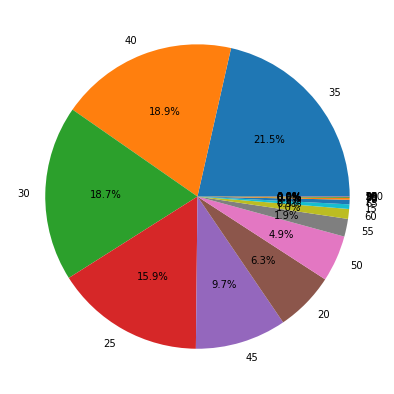

In [175]:
# 고객 수 자체도 30대가 가장 많은 것을 알 수 있음
plt.figure(figsize=(7,7),facecolor="white")
labels = a['age_group'].value_counts().index.to_list()
plt.pie(a['age_group'].value_counts(),labels=labels,autopct='%.1f%%')
plt.show()

In [176]:
# 나이대별 총 거래량 분포
groups = sorted(a['age_group'].unique().tolist())

for group in groups:
    display(group)
    display(a[a['age_group'] == group].describe())

15

,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion,push_permission,gender,is_foreigner,once,discount_rate,cashback_rate,promotion_rate,age,age_group
count,2631.000,2631.000,2631.000,2631.000,2631.000,2631.000,2631.000,2631.000,2631.000,2631.000,2631.000,2631.000,2631.000,2631.000
mean,77997.030,71995.819,478.834,6001.212,6480.045,4.013,4.295,0.000,0.406,0.489,0.038,0.526,97.480,15.000
std,142042.500,134822.907,1338.549,8666.818,9094.173,7.394,7.853,0.000,0.491,0.687,0.086,0.725,150.290,0.000
min,790.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,16.000,15.000
25%,13800.000,10975.000,0.000,2000.000,2000.000,0.000,0.000,0.000,0.000,0.111,0.000,0.116,19.000,15.000
50%,31100.000,27900.000,0.000,4000.000,4100.000,1.000,1.000,0.000,0.000,0.280,0.000,0.299,38.000,15.000
75%,87815.000,81534.500,387.000,7000.000,7422.000,4.000,5.000,0.000,1.000,0.597,0.030,0.643,108.000,15.000
max,2833100.000,2742100.000,32210.000,138670.000,138670.000,107.000,107.000,0.000,1.000,8.772,1.020,8.772,1926.000,15.000


20

,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion,push_permission,gender,is_foreigner,once,discount_rate,cashback_rate,promotion_rate,age,age_group
count,34226.000,34226.000,34226.000,34226.000,34226.000,34226.000,34226.000,34226.000,34226.000,34226.000,34226.000,34226.000,34226.000,34226.000
mean,138645.540,129569.087,929.272,9076.453,10005.725,3.840,6.005,0.059,0.367,0.636,0.049,0.685,161.868,20.000
std,229342.548,218153.735,2851.524,13310.888,14662.838,9.923,11.561,1.556,0.482,1.050,0.142,1.134,275.635,0.000
min,500.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,20.000,20.000
25%,21000.000,17900.000,0.000,2000.000,2001.750,0.000,1.000,0.000,0.000,0.110,0.000,0.111,24.000,20.000
50%,56400.000,52175.000,0.000,5000.000,5000.000,0.000,1.000,0.000,0.000,0.293,0.000,0.317,48.000,20.000
75%,160106.750,149248.750,684.000,10000.000,11183.750,3.000,6.000,0.000,1.000,0.736,0.030,0.791,176.000,20.000
max,4750530.000,4637063.000,92231.000,382179.000,412555.000,233.000,249.000,107.000,1.000,24.119,4.280,26.182,5592.000,20.000


25

,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion,push_permission,gender,is_foreigner,once,discount_rate,cashback_rate,promotion_rate,age,age_group
count,85784.000,85784.000,85784.000,85784.000,85784.000,85784.000,85784.000,85784.000,85784.000,85784.000,85784.000,85784.000,85784.000,85784.000
mean,170568.465,159372.482,1100.951,11195.983,12296.934,3.042,6.268,0.171,0.339,0.765,0.056,0.821,220.632,25.000
std,361514.282,346647.218,4673.065,18122.578,20148.824,13.187,15.801,7.530,0.473,1.325,0.267,1.447,453.773,0.000
min,500.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,25.000,25.000
25%,23400.000,19800.000,0.000,2000.000,2451.000,0.000,0.000,0.000,0.000,0.111,0.000,0.125,28.000,25.000
50%,63635.000,57899.000,0.000,5000.000,5890.000,0.000,1.000,0.000,0.000,0.325,0.000,0.342,78.000,25.000
75%,184509.250,172024.000,749.000,12051.000,13423.500,1.000,6.000,0.000,1.000,0.848,0.030,0.905,232.000,25.000
max,24720400.000,24118300.000,851803.000,698680.000,961803.000,1363.000,1363.000,1229.000,1.000,39.108,55.575,61.661,39527.000,25.000


30

,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion,push_permission,gender,is_foreigner,once,discount_rate,cashback_rate,promotion_rate,age,age_group
count,100924.000,100924.000,100924.000,100924.000,100924.000,100924.000,100924.000,100924.000,100924.000,100924.000,100924.000,100924.000,100924.000,100924.000
mean,191683.498,178507.613,1148.432,13175.885,14324.317,3.253,6.820,0.183,0.307,0.920,0.060,0.980,288.211,30.000
std,448855.231,430377.778,4505.527,22307.358,24588.422,17.985,20.456,5.010,0.461,1.612,0.220,1.744,678.760,0.000
min,500.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,30.000,30.000
25%,23700.000,19860.000,0.000,2000.000,2850.000,0.000,0.000,0.000,0.000,0.144,0.000,0.156,34.000,30.000
50%,64342.000,57755.000,0.000,6000.000,6388.500,0.000,1.000,0.000,0.000,0.391,0.000,0.408,99.000,30.000
75%,190256.750,176502.500,605.000,14153.250,15311.250,1.000,6.000,0.000,1.000,1.001,0.030,1.057,288.000,30.000
max,35043786.000,34447704.000,248180.000,767340.000,812772.000,2705.000,2705.000,1020.000,1.000,59.886,15.989,67.879,86560.000,30.000


35

,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion,push_permission,gender,is_foreigner,once,discount_rate,cashback_rate,promotion_rate,age,age_group
count,116083.000,116083.000,116083.000,116083.000,116083.000,116083.000,116083.000,116083.000,116083.000,116083.000,116083.000,116083.000,116083.000,116083.000
mean,205281.839,190606.957,1163.149,14674.882,15838.032,4.268,7.303,0.116,0.282,1.047,0.065,1.112,365.429,35.000
std,605232.271,583841.098,4384.843,26123.211,28338.709,14.275,17.214,2.853,0.450,1.790,0.232,1.929,688.930,0.000
min,500.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,35.000,35.000
25%,23879.000,19980.000,0.000,2750.000,3000.000,0.000,0.000,0.000,0.000,0.169,0.000,0.179,39.000,35.000
50%,65600.000,58500.000,0.000,6501.000,7000.000,0.000,1.000,0.000,0.000,0.440,0.000,0.463,117.000,35.000
75%,196972.000,181195.000,552.000,15750.000,16868.500,2.000,6.000,0.000,1.000,1.144,0.030,1.207,360.000,35.000
max,110444100.000,108395600.000,202326.000,2048500.000,2198593.000,585.000,585.000,308.000,1.000,45.420,13.134,56.043,21060.000,35.000


40

,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion,push_permission,gender,is_foreigner,once,discount_rate,cashback_rate,promotion_rate,age,age_group
count,102080.000,102080.000,102080.000,102080.000,102080.000,102080.000,102080.000,102080.000,102080.000,102080.000,102080.000,102080.000,102080.000,102080.000
mean,235678.822,218805.216,1384.208,16873.606,18257.814,6.473,8.248,0.063,0.270,1.194,0.077,1.271,488.691,40.000
std,542446.232,517258.050,5011.840,29045.747,31618.289,18.306,20.141,1.936,0.444,2.066,0.265,2.226,917.638,0.000
min,500.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,40.000,40.000
25%,25410.000,21700.000,0.000,3000.000,3500.000,0.000,0.000,0.000,0.000,0.172,0.000,0.189,44.000,40.000
50%,73100.000,65422.000,0.000,7000.000,7566.500,0.000,1.000,0.000,0.000,0.463,0.000,0.495,160.000,40.000
75%,232223.250,214091.000,657.000,18013.750,19609.250,4.000,6.000,0.000,1.000,1.277,0.030,1.353,484.000,40.000
max,36801930.000,35664860.000,249438.000,1202700.000,1202700.000,430.000,430.000,171.000,1.000,51.013,10.919,57.593,18920.000,40.000


45

,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion,push_permission,gender,is_foreigner,once,discount_rate,cashback_rate,promotion_rate,age,age_group
count,52371.000,52371.000,52371.000,52371.000,52371.000,52371.000,52371.000,52371.000,52371.000,52371.000,52371.000,52371.000,52371.000,52371.000
mean,266221.804,247661.458,1595.300,18560.346,20155.646,8.725,8.775,0.052,0.266,1.279,0.087,1.367,618.745,45.000
std,773048.260,743495.849,5537.822,34835.488,37571.833,22.033,22.186,1.742,0.442,2.239,0.288,2.411,1153.010,0.000
min,750.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,45.000,45.000
25%,26700.000,22700.000,0.000,3000.000,3500.000,0.000,0.000,0.000,0.000,0.169,0.000,0.185,49.000,45.000
50%,80267.000,72460.000,0.000,7000.000,7867.000,1.000,1.000,0.000,0.000,0.461,0.000,0.497,188.000,45.000
75%,265270.000,244420.000,812.000,20000.000,21500.500,6.000,6.000,0.000,1.000,1.375,0.060,1.461,630.000,45.000
max,115005350.000,112273800.000,196824.000,2731550.000,2731550.000,464.000,464.000,156.000,1.000,40.895,10.563,45.262,22736.000,45.000


50

,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion,push_permission,gender,is_foreigner,once,discount_rate,cashback_rate,promotion_rate,age,age_group
count,26619.000,26619.000,26619.000,26619.000,26619.000,26619.000,26619.000,26619.000,26619.000,26619.000,26619.000,26619.000,26619.000,26619.000
mean,298765.834,278400.859,1880.866,20364.975,22245.841,11.605,10.282,0.085,0.258,1.432,0.103,1.535,800.327,50.000
std,780367.419,749771.039,6046.656,36072.300,39251.353,26.146,25.467,2.885,0.437,2.465,0.316,2.661,1454.446,0.000
min,500.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,50.000,50.000
25%,27800.000,23900.000,0.000,3000.000,3501.000,0.000,0.000,0.000,0.000,0.171,0.000,0.193,54.000,50.000
50%,88020.000,79687.000,0.000,7580.000,8000.000,2.000,1.000,0.000,0.000,0.493,0.000,0.527,216.000,50.000
75%,304905.000,282196.500,1047.000,22440.000,24383.000,10.000,7.000,0.000,1.000,1.556,0.060,1.658,832.000,50.000
max,76952000.000,75176900.000,142275.000,1775100.000,1775100.000,421.000,421.000,274.000,1.000,35.394,7.983,37.948,21050.000,50.000


55

,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion,push_permission,gender,is_foreigner,once,discount_rate,cashback_rate,promotion_rate,age,age_group
count,10203.000,10203.000,10203.000,10203.000,10203.000,10203.000,10203.000,10203.000,10203.000,10203.000,10203.000,10203.000,10203.000,10203.000
mean,299921.250,279640.431,1898.113,20280.819,22178.932,13.023,10.518,0.078,0.261,1.451,0.105,1.556,909.633,55.000
std,614928.269,583868.908,6132.919,35039.577,38552.682,28.588,26.284,2.309,0.439,2.605,0.330,2.807,1712.450,0.000
min,909.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,55.000,55.000
25%,26600.000,22979.500,0.000,3000.000,3650.000,0.000,0.000,0.000,0.000,0.179,0.000,0.197,59.000,55.000
50%,85130.000,77660.000,0.000,7500.000,8000.000,2.000,1.000,0.000,0.000,0.504,0.000,0.542,232.000,55.000
75%,310704.000,289006.000,1065.000,22000.000,24068.000,12.000,7.000,0.000,1.000,1.508,0.060,1.622,935.000,55.000
max,19850840.000,19107810.000,100714.000,743030.000,749307.000,416.000,416.000,193.000,1.000,43.570,9.516,53.086,23305.000,55.000


60

,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion,push_permission,gender,is_foreigner,once,discount_rate,cashback_rate,promotion_rate,age,age_group
count,5665.000,5665.000,5665.000,5665.000,5665.000,5665.000,5665.000,5665.000,5665.000,5665.000,5665.000,5665.000,5665.000,5665.000
mean,297504.176,277205.259,1945.016,20298.917,22243.933,12.652,10.153,0.160,0.276,1.500,0.108,1.609,987.092,60.000
std,693302.382,663030.404,7923.961,35588.958,39207.178,27.534,25.549,3.659,0.447,2.595,0.334,2.791,1819.187,0.000
min,840.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,60.000,60.000
25%,23830.000,20000.000,0.000,3000.000,3596.000,0.000,0.000,0.000,0.000,0.183,0.000,0.202,64.000,60.000
50%,75800.000,68160.000,0.000,7000.000,7972.000,2.000,1.000,0.000,0.000,0.532,0.000,0.568,248.000,60.000
75%,301265.000,280946.000,1017.000,22706.000,24303.000,11.000,6.000,0.000,1.000,1.581,0.060,1.698,992.000,60.000
max,21484536.000,20677136.000,312593.000,807400.000,808678.000,289.000,289.000,158.000,1.000,29.315,5.468,30.885,18496.000,60.000


65

,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion,push_permission,gender,is_foreigner,once,discount_rate,cashback_rate,promotion_rate,age,age_group
count,2596.000,2596.000,2596.000,2596.000,2596.000,2596.000,2596.000,2596.000,2596.000,2596.000,2596.000,2596.000,2596.000,2596.000
mean,284871.276,265269.244,1475.112,19602.032,21077.145,11.404,8.070,0.055,0.287,1.501,0.092,1.593,954.319,65.000
std,643336.783,613838.678,5259.654,34964.293,37599.312,27.085,24.244,1.546,0.453,2.740,0.331,2.936,1905.824,0.000
min,500.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,65.000,65.000
25%,19889.500,16590.000,0.000,3000.000,3707.500,0.000,0.000,0.000,0.000,0.202,0.000,0.213,69.000,65.000
50%,67825.000,59395.000,0.000,7000.000,7798.500,2.000,1.000,0.000,0.000,0.572,0.000,0.598,264.000,65.000
75%,260216.250,238985.750,548.500,20693.250,22450.750,9.000,4.000,0.000,1.000,1.580,0.030,1.682,884.000,65.000
max,11595830.000,11188960.000,89505.000,406870.000,439015.000,385.000,385.000,70.000,1.000,29.107,5.081,33.560,25795.000,65.000


70

,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion,push_permission,gender,is_foreigner,once,discount_rate,cashback_rate,promotion_rate,age,age_group
count,1028.000,1028.000,1028.000,1028.000,1028.000,1028.000,1028.000,1028.000,1028.000,1028.000,1028.000,1028.000,1028.000,1028.000
mean,332483.198,311438.329,1237.361,21044.870,22282.231,9.214,6.154,0.018,0.318,1.425,0.076,1.500,877.214,70.000
std,1342882.431,1301270.676,4416.925,47532.945,49300.977,22.674,17.423,0.392,0.466,2.420,0.245,2.562,1736.620,0.000
min,1328.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,70.000,70.000
25%,19422.500,15125.000,0.000,3207.500,4000.000,0.000,0.000,0.000,0.000,0.194,0.000,0.203,73.000,70.000
50%,55100.000,48964.500,0.000,7000.000,7292.000,1.000,1.000,0.000,0.000,0.573,0.000,0.585,219.000,70.000
75%,229220.000,210595.000,294.250,20340.000,21956.500,6.000,4.000,0.000,1.000,1.471,0.030,1.591,770.000,70.000
max,33798700.000,33027600.000,70457.000,771100.000,771100.000,258.000,258.000,11.000,1.000,26.341,3.447,29.111,19092.000,70.000


75

,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion,push_permission,gender,is_foreigner,once,discount_rate,cashback_rate,promotion_rate,age,age_group
count,477.000,477.000,477.000,477.000,477.000,477.000,477.000,477.000,477.000,477.000,477.000,477.000,477.000,477.000
mean,266835.560,247955.109,1339.553,18880.451,20220.004,8.558,5.962,0.000,0.308,1.483,0.082,1.565,935.541,75.000
std,807056.471,772180.256,4059.199,38419.295,40095.314,22.357,15.769,0.000,0.462,2.964,0.256,3.079,1856.246,0.000
min,2900.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,75.000,75.000
25%,17700.000,12900.000,0.000,3281.000,4000.000,0.000,0.000,0.000,0.000,0.218,0.000,0.225,79.000,75.000
50%,50537.000,43400.000,0.000,7000.000,7820.000,1.000,1.000,0.000,0.000,0.575,0.000,0.633,237.000,75.000
75%,198305.000,184740.000,477.000,19158.000,20000.000,7.000,4.000,0.000,1.000,1.523,0.030,1.625,760.000,75.000
max,13974900.000,13408900.000,35662.000,566000.000,576575.000,245.000,126.000,0.000,1.000,41.038,3.074,41.367,18620.000,75.000


80

,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion,push_permission,gender,is_foreigner,once,discount_rate,cashback_rate,promotion_rate,age,age_group
count,214.000,214.000,214.000,214.000,214.000,214.000,214.000,214.000,214.000,214.000,214.000,214.000,214.000,214.000
mean,298972.879,278692.145,890.173,20280.734,21170.907,7.972,6.822,0.000,0.234,1.433,0.055,1.488,921.864,80.000
std,797681.454,767835.870,2911.798,34341.763,35011.965,15.785,13.802,0.000,0.424,1.881,0.155,1.926,1340.443,0.000
min,2900.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,80.000,80.000
25%,21900.000,17642.500,0.000,4307.500,4700.500,0.000,0.000,0.000,0.000,0.297,0.000,0.305,160.000,80.000
50%,83450.000,74866.000,0.000,9175.000,10000.000,2.000,1.000,0.000,0.000,0.769,0.000,0.785,480.000,80.000
75%,206060.000,184191.250,334.500,23275.000,23654.750,8.000,8.000,0.000,0.000,1.811,0.030,1.857,996.000,80.000
max,8254000.000,8006400.000,28528.000,247600.000,247600.000,101.000,101.000,0.000,1.000,13.379,1.379,13.379,8080.000,80.000


85

,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion,push_permission,gender,is_foreigner,once,discount_rate,cashback_rate,promotion_rate,age,age_group
count,87.000,87.000,87.000,87.000,87.000,87.000,87.000,87.000,87.000,87.000,87.000,87.000,87.000,87.000
mean,339226.701,313983.023,1738.115,25243.678,26981.793,13.253,12.920,0.000,0.218,1.842,0.078,1.920,1435.460,85.000
std,661347.570,623808.673,6368.024,42431.824,45673.363,24.542,24.401,0.000,0.416,2.578,0.173,2.663,2161.482,0.000
min,5000.000,0.000,0.000,0.000,1000.000,0.000,0.000,0.000,0.000,0.000,0.000,0.030,85.000,85.000
25%,21620.000,16769.500,0.000,5000.000,5000.000,0.000,0.000,0.000,0.000,0.389,0.000,0.389,176.000,85.000
50%,76933.000,67137.000,0.000,9796.000,9796.000,3.000,3.000,0.000,0.000,0.962,0.000,1.000,510.000,85.000
75%,361353.000,324106.000,663.000,28820.000,29917.000,17.000,15.500,0.000,0.000,2.451,0.060,2.473,1666.500,85.000
max,4180987.000,3852425.000,54910.000,328562.000,342525.000,159.000,159.000,0.000,1.000,14.270,1.120,14.510,13515.000,85.000


90

,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion,push_permission,gender,is_foreigner,once,discount_rate,cashback_rate,promotion_rate,age,age_group
count,28.000,28.000,28.000,28.000,28.000,28.000,28.000,28.000,28.000,28.000,28.000,28.000,28.000,28.000
mean,416311.571,387090.179,1746.929,29221.393,30968.321,16.071,15.214,0.000,0.250,2.133,0.117,2.250,1878.821,90.000
std,695928.510,658473.308,3794.884,43471.312,45489.668,39.143,37.331,0.000,0.441,3.070,0.257,3.250,3448.095,0.000
min,5900.000,3900.000,0.000,0.000,351.000,0.000,0.000,0.000,0.000,0.000,0.000,0.030,90.000,90.000
25%,25206.500,22238.500,0.000,5000.000,5000.000,0.000,0.000,0.000,0.000,0.356,0.000,0.356,160.000,90.000
50%,83915.000,73854.500,0.000,10965.000,14034.500,0.000,2.500,0.000,0.000,1.008,0.000,1.008,452.500,90.000
75%,319368.750,280884.500,367.500,28776.500,32245.750,6.750,8.750,0.000,0.250,2.510,0.030,2.510,1650.750,90.000
max,2518279.000,2321082.000,15494.000,197197.000,203431.000,161.000,161.000,0.000,1.000,12.580,1.049,13.629,14490.000,90.000


95

,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion,push_permission,gender,is_foreigner,once,discount_rate,cashback_rate,promotion_rate,age,age_group
count,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000
mean,5420.000,420.000,0.000,5000.000,5000.000,0.500,0.500,0.000,1.000,0.924,0.000,0.924,96.000,95.000
std,311.127,311.127,0.000,0.000,0.000,0.707,0.707,0.000,0.000,0.053,0.000,0.053,0.000,0.000
min,5200.000,200.000,0.000,5000.000,5000.000,0.000,0.000,0.000,1.000,0.887,0.000,0.887,96.000,95.000
25%,5310.000,310.000,0.000,5000.000,5000.000,0.250,0.250,0.000,1.000,0.905,0.000,0.905,96.000,95.000
50%,5420.000,420.000,0.000,5000.000,5000.000,0.500,0.500,0.000,1.000,0.924,0.000,0.924,96.000,95.000
75%,5530.000,530.000,0.000,5000.000,5000.000,0.750,0.750,0.000,1.000,0.943,0.000,0.943,96.000,95.000
max,5640.000,640.000,0.000,5000.000,5000.000,1.000,1.000,0.000,1.000,0.962,0.000,0.962,96.000,95.000


100

,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion,push_permission,gender,is_foreigner,once,discount_rate,cashback_rate,promotion_rate,age,age_group
count,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
mean,68680.000,52160.000,0.000,16520.000,16520.000,0.000,6.000,0.000,0.000,2.190,0.000,2.190,618.000,100.000
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,68680.000,52160.000,0.000,16520.000,16520.000,0.000,6.000,0.000,0.000,2.190,0.000,2.190,618.000,100.000
25%,68680.000,52160.000,0.000,16520.000,16520.000,0.000,6.000,0.000,0.000,2.190,0.000,2.190,618.000,100.000
50%,68680.000,52160.000,0.000,16520.000,16520.000,0.000,6.000,0.000,0.000,2.190,0.000,2.190,618.000,100.000
75%,68680.000,52160.000,0.000,16520.000,16520.000,0.000,6.000,0.000,0.000,2.190,0.000,2.190,618.000,100.000
max,68680.000,52160.000,0.000,16520.000,16520.000,0.000,6.000,0.000,0.000,2.190,0.000,2.190,618.000,100.000


### Heavy vs Light

In [38]:
# 유저 별 구매량 총합 -> 75% 지점을 기준으로 라이트 유저와 헤비 유저 분리
df.groupby(df['customer_id']).sum().describe()

,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion,push_permission,gender,is_foreigner,once,discount_rate,cashback_rate,promotion_rate,age
count,544921.000,544921.000,544921.000,544921.000,544921.000,544921.000,544921.000,544921.000,544921.000,544921.000,544921.000,544921.000,544921.000
mean,211107.465,196438.240,1265.993,14669.225,15935.218,5.335,7.469,0.114,0.300,1.031,0.069,1.100,403.702
std,550003.100,527836.212,4782.908,26430.607,28799.927,17.769,19.208,4.137,0.458,1.844,0.251,1.990,877.554
min,500.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,16.000
25%,23800.000,20140.000,0.000,2000.000,3000.000,0.000,0.000,0.000,0.000,0.152,0.000,0.166,44.000
50%,67300.000,60480.000,0.000,6000.000,6681.000,0.000,1.000,0.000,0.000,0.408,0.000,0.430,120.000
75%,206356.000,191024.000,660.000,15396.000,16663.000,3.000,6.000,0.000,1.000,1.088,0.030,1.152,372.000
max,115005350.000,112273800.000,851803.000,2731550.000,2731550.000,2705.000,2705.000,1229.000,1.000,59.886,55.575,67.879,86560.000


In [39]:
# customer sum -> df_cs 활용하여 heavy column 생성
df_cs = df.groupby(df['customer_id']).sum().reset_index()
df_cs['heavy'] = False
df_cs.loc[df_cs['pre_discount']>=200000,'heavy'] = True
df_cs['heavy'].value_counts()

False    405502
True     139419
Name: heavy, dtype: int64

In [40]:
# 전체 사용자 중 1/4(25%) 정도를 heavy 유저로 선정
len(df_cs[df_cs['heavy']==True])/len(df_cs)

0.25585176566878504

In [41]:
# merge 활용해 data에 heavy 추가
df_cs2 = df_cs.iloc[:,[0,-1]]
df = pd.merge(df,df_cs2,on='customer_id')

In [42]:
# 번외: 1회 구매자인데 heavy 유저는 3200여명
df[(df['once']==True) & (df['heavy']==True)]

,customer_id,created_at,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion,push_permission,gender,is_foreigner,birthday,sign_up_date,merchant_id,once,discount_rate,cashback_rate,promotion_rate,age,heavy
114079,117578,2020-02-28 00:30:19.023,1129760,1129760,56487,0,56487,False,0,False,1988-04-16,2020-02-26 19:19:20.715,7,True,0.000,0.050,0.050,34,True
182375,179440,2020-01-26 22:09:52.742,282000,273000,0,9000,9000,False,0,False,1995-11-04,2020-01-26 22:11:09.055,9,True,0.032,0.000,0.032,26,True
261122,529596,2019-09-24 00:31:40.457,210800,200800,0,10000,10000,True,0,False,1967-07-28,2019-09-23 23:32:22.294,6,True,0.047,0.000,0.047,55,True
271558,179295,2019-10-07 21:46:55.387,789000,779000,0,10000,10000,True,1,False,1985-02-07,2019-10-07 21:45:10.160,3,True,0.013,0.000,0.013,37,True
311248,405532,2019-10-29 21:07:35.124,242740,232740,0,10000,10000,False,0,False,1900-01-01,2019-10-29 21:09:07.792,3,True,0.041,0.000,0.041,122,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5623587,354947,2019-10-14 15:25:12.616,262000,252000,0,10000,10000,False,1,False,1992-07-09,2019-10-14 15:21:54.228,7,True,0.038,0.000,0.038,30,True
5623642,345794,2020-01-13 18:59:11.128,282000,271500,0,10500,10500,False,0,False,1980-11-28,2020-01-12 14:12:01.913,3,True,0.037,0.000,0.037,41,True
5623727,113662,2020-01-12 07:25:54.266,958800,928200,0,30600,30600,False,0,False,1989-04-04,2020-01-12 07:20:03.861,3,True,0.032,0.000,0.032,33,True
5623757,474500,2020-01-20 20:11:06.324,282000,273000,0,9000,9000,False,0,False,1991-01-21,2020-01-14 06:24:04.417,8,True,0.032,0.000,0.032,31,True


In [43]:
# Heavy 유저와 Light 유저 비교
# Heavy
display(df[df['heavy']==True].describe())
# Light
display(df[df['heavy']==False].describe())

,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion,gender,discount_rate,cashback_rate,promotion_rate,age
count,4208394.000,4208394.000,4208394.000,4208394.000,4208394.000,4208394.000,4208394.000,4208394.000,4208394.000,4208394.000
mean,21733.358,20396.437,137.187,1336.921,1474.108,0.749,0.088,0.007,0.095,39.726
std,55350.166,54015.455,664.908,2021.687,2059.007,0.434,0.094,0.015,0.091,9.707
min,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,16.000
25%,7900.000,7000.000,0.000,0.000,521.000,0.000,0.000,0.000,0.032,33.000
50%,12258.500,11040.000,0.000,1000.000,1000.000,1.000,0.094,0.000,0.096,39.000
75%,19900.000,18700.000,0.000,2000.000,2000.000,1.000,0.111,0.000,0.111,45.000
max,1996000.000,1996000.000,97473.000,500000.000,500000.000,1.000,1.000,0.050,1.000,122.000


,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion,gender,discount_rate,cashback_rate,promotion_rate,age
count,1415416.000,1415416.000,1415416.000,1415416.000,1415416.000,1415416.000,1415416.000,1415416.000,1415416.000,1415416.000
mean,16655.427,14982.929,79.502,1672.498,1751.999,0.649,0.135,0.005,0.140,37.304
std,17529.774,16953.204,287.476,1742.703,1704.010,0.477,0.156,0.012,0.153,10.671
min,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,16.000
25%,7650.000,5900.000,0.000,297.000,590.000,0.000,0.027,0.000,0.035,30.000
50%,11800.000,9900.000,0.000,1501.000,1501.000,1.000,0.111,0.000,0.111,37.000
75%,18800.000,17060.000,0.000,2000.000,2000.000,1.000,0.168,0.000,0.168,42.000
max,199900.000,199000.000,9943.000,40000.000,40000.000,1.000,1.000,0.050,1.000,122.000


**Analysis**
- Heavy 유저는 전체 유저의 25%(139419), 기간 동안 20만원 이상 구매한 고객들
- 유저 수는 Heavy 유저가 3배 적지만 거래량은 Light 유저 대비 3배나 많다
- 평균 결제 금액은 약 5000원 정도 차이
- 사분위수를 봐도 둘 다 1회 당 결제 금액의 분포는 대동소이 하다 -> Heavy 유저 중에도 VIP가 존재하는 것으로 보인다
- 전반적인 수치는 대부분 Heavy 유저가 높지만, 거래당 평균 할인 금액은 Light 유저가 앞선다 -> 초반 결제 혜택이 작용하는 것으로 예상
- Heavy 유저는 단순 할인 외에 이유로도 계속 서비스를 이용하는 것으로 예상
- gender 수치 분포를 보아 Heavy 유저는 여성이 더 많다

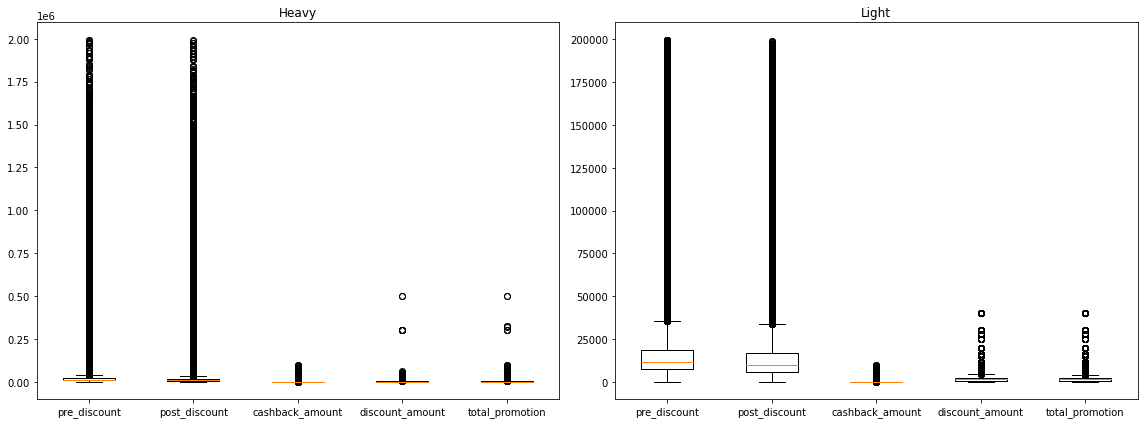

In [44]:
# 데이터 분포 -> Heavy 유저 안에서는 여전히 유저 간 격차가 심하다
plt.figure(figsize=(16,6))
labels=['pre_discount','post_discount','cashback_amount','discount_amount','total_promotion']

ax1 = plt.subplot(121)
ax1.set_title('Heavy')
graph1 = plt.boxplot(df[df['heavy']==True].iloc[:,2:7],labels=labels)

ax2 = plt.subplot(122)
ax2.set_title('Light')
graph2 = plt.boxplot(df[df['heavy']==False].iloc[:,2:7],labels=labels)

plt.tight_layout()

plt.show()

In [45]:
# Heavy 유저 내에서도 
df[(df['heavy']==True) & (df['pre_discount']>18800)]

,customer_id,created_at,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion,push_permission,gender,is_foreigner,birthday,sign_up_date,merchant_id,once,discount_rate,cashback_rate,promotion_rate,age,heavy
0,207317,2020-03-22 10:27:52.498,36236,36236,1087,0,1087,True,1,False,1957-11-05,2019-11-30 16:48:19.339,9,False,0.000,0.030,0.030,64,True
4,207317,2019-12-10 10:27:23.407,25690,24690,0,1000,1000,True,1,False,1957-11-05,2019-11-30 16:48:19.339,7,False,0.039,0.000,0.039,64,True
5,207317,2020-01-21 15:55:37.924,35096,34096,0,1000,1000,True,1,False,1957-11-05,2019-11-30 16:48:19.339,3,False,0.028,0.000,0.028,64,True
10,207317,2020-03-07 12:31:48.825,61400,61400,1842,0,1842,True,1,False,1957-11-05,2019-11-30 16:48:19.339,6,False,0.000,0.030,0.030,64,True
11,207317,2020-03-04 17:06:50.666,58823,58823,1764,0,1764,True,1,False,1957-11-05,2019-11-30 16:48:19.339,7,False,0.000,0.030,0.030,64,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5623587,354947,2019-10-14 15:25:12.616,262000,252000,0,10000,10000,False,1,False,1992-07-09,2019-10-14 15:21:54.228,7,True,0.038,0.000,0.038,30,True
5623642,345794,2020-01-13 18:59:11.128,282000,271500,0,10500,10500,False,0,False,1980-11-28,2020-01-12 14:12:01.913,3,True,0.037,0.000,0.037,41,True
5623727,113662,2020-01-12 07:25:54.266,958800,928200,0,30600,30600,False,0,False,1989-04-04,2020-01-12 07:20:03.861,3,True,0.032,0.000,0.032,33,True
5623757,474500,2020-01-20 20:11:06.324,282000,273000,0,9000,9000,False,0,False,1991-01-21,2020-01-14 06:24:04.417,8,True,0.032,0.000,0.032,31,True
